# New York Restaurants Analysis



### Introduction/Buisness Problem
New York is big city with high diversity of food that restaurants offer. When someone is looking to open a restaurant there, it is difficult to break into market because there are many restaurants. And this problem is getting even bigger in New York where you can find a lot of restaurants that are popular, and people are used to going there. To make restaurant as successful as possible, it would be great if future owner would know what the best place is for opening new restaurant according to kind of food that it would offer. 

The problem that will be solved in this case is finding answer on question where to open a restaurant. In this case I will consider one of the most popular borough of New York, Manhattan. Also, I will consider three types of restaurants that are the most popular: Italian, American and Mexican. I will take in account what ratings have these restaurants and where are they located. 

According to analysis of ratings and types of restaurants, client will see on map where he/she can open a restaurant without good competition nearby. Considering that Manhattan is big, if someone wants to eat something good, proximity will play an essential role in success of restaurant at the beginning.


### Data 

First, I will use data that we used for our Foursquare Lab about neighborhoods in New York. Another data that will be used is from Foursquare locator. In next chapter I will explain why I used each data, how I cleaned it and what features are important for this case. 

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import json

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
#my foursquare credentials
CLIENT_ID = '3LY23BR1LK4TKDQG54PQOJ54YWIROEACXOG0GKDG11XPEDJX' # your Foursquare ID
CLIENT_SECRET = 'XNZS1PI4JDRPVMF3TBSJ5BH3PJW2VLDK5344LUMU1PI4IXRE' # your Foursquare Secret
VERSION = '20180604'
ACCESS_TOKEN = 'OQTW0WC0DJ1H0BDLT5YDOZSX3WJCMTTFAKIV10B0QDECZKCW'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3LY23BR1LK4TKDQG54PQOJ54YWIROEACXOG0GKDG11XPEDJX
CLIENT_SECRET:XNZS1PI4JDRPVMF3TBSJ5BH3PJW2VLDK5344LUMU1PI4IXRE


In [3]:
#downloading data of New York neighborhood
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [4]:
#opening data
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

### Putting data in pandas dataframe

In [6]:
neighborhoods_data = newyork_data['features']

In [7]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [8]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Finding New York coordinates and map of New York

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


In [12]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Cleaning data --> considering only borough Manhattan

In [13]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [14]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [15]:
# create map of Manhattan using latitude and longitude values with neighborhoods
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### Exploring Manhattan - finding restaurants

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
manhattan_venues = getNearbyVenues(names = manhattan_data['Neighborhood'], latitudes = manhattan_data['Latitude'], 
                                                          longitudes = manhattan_data['Longitude'], radius=800)

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [20]:
print(manhattan_venues.shape)
manhattan_venues.head()

(1200, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
3,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [21]:
filtered = manhattan_venues[manhattan_venues['Venue Category'].str.contains('Restaurant')]
filtered.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
5,Marble Hill,40.876551,-73.91066,Estrellita Poblana V,40.879687,-73.906257,Mexican Restaurant
7,Marble Hill,40.876551,-73.91066,El Malecon,40.879338,-73.904457,Caribbean Restaurant
18,Marble Hill,40.876551,-73.91066,El Economico Restaurant,40.879330,-73.904597,Spanish Restaurant
22,Marble Hill,40.876551,-73.91066,Picante Picante Mexican Restaurant,40.878252,-73.902936,Mexican Restaurant
23,Marble Hill,40.876551,-73.91066,Siam Square,40.878796,-73.916701,Thai Restaurant


In [22]:
filtered.shape

(327, 7)

In [23]:
# create map of Manhattan restaurants using latitude and longitude values with neighborhoods
map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(filtered['Venue Latitude'], filtered['Venue Longitude'], filtered['Venue Category']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_restaurants)  
    
map_restaurants

In [24]:
pie_plot = filtered['Venue Category'].value_counts().to_frame()
pie_plot

,Venue Category
Italian Restaurant,36
American Restaurant,35
Mexican Restaurant,23
French Restaurant,21
Sushi Restaurant,17
Thai Restaurant,17
Japanese Restaurant,15
Seafood Restaurant,12
Chinese Restaurant,12
Mediterranean Restaurant,12


In [25]:
pie_plot = pie_plot[pie_plot['Venue Category'] > 1]
df2 = pd.DataFrame(data = [17], columns = {'Venue Category'})
pie_plot = pie_plot.append(df2)
pie_plot.rename(index = {0:'Other'},inplace = True)

In [26]:
pie_plot

,Venue Category
Italian Restaurant,36
American Restaurant,35
Mexican Restaurant,23
French Restaurant,21
Sushi Restaurant,17
Thai Restaurant,17
Japanese Restaurant,15
Seafood Restaurant,12
Chinese Restaurant,12
Mediterranean Restaurant,12


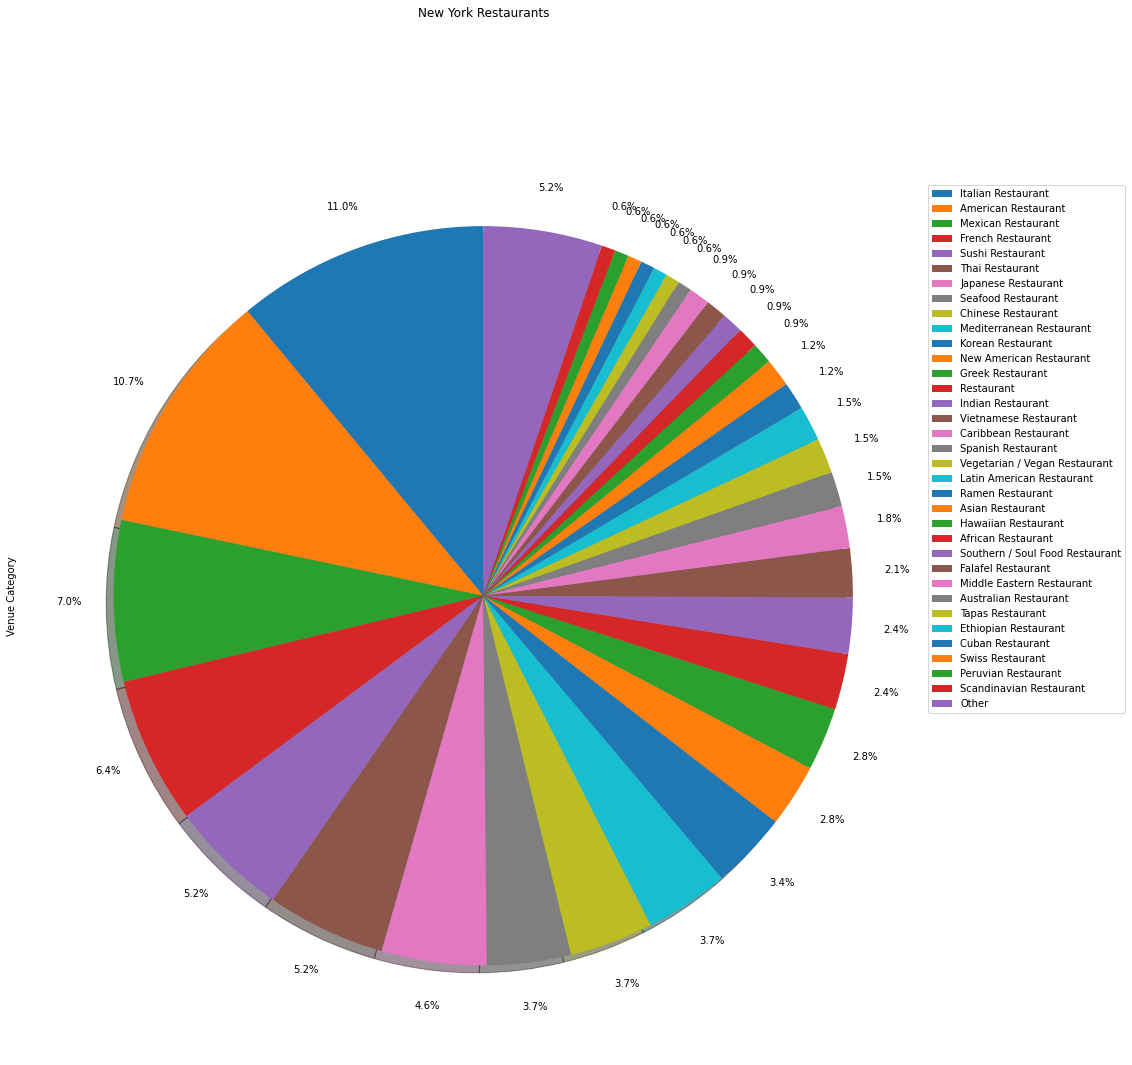

In [27]:
import matplotlib.pyplot as plt

pie_plot['Venue Category'].plot(kind='pie',
                            figsize=(25, 17),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12, # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

# scale the title up by 12% to match pctdistance
plt.title('New York Restaurants', y = 1.12) 


# add legend
plt.legend(labels = pie_plot.index, loc = 'upper right', bbox_to_anchor=(1.2, 0.95)) 

plt.show()

### I will consider three types of restaurants that are most common: american, italian and mexican.

In [28]:
manhattan_italian_restaurants = manhattan_venues[manhattan_venues['Venue Category'] == 'Italian Restaurant']
manhattan_italian_restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
64,Washington Heights,40.851903,-73.936900,Saggio Restaurant,40.851423,-73.939761,Italian Restaurant
122,Hamilton Heights,40.823604,-73.949688,Fumo,40.821412,-73.950499,Italian Restaurant
158,Manhattanville,40.816934,-73.957385,Pisticci Ristorante,40.814015,-73.960266,Italian Restaurant
170,Manhattanville,40.816934,-73.957385,Bettolona,40.814084,-73.959574,Italian Restaurant
241,Upper East Side,40.775639,-73.960508,Sant Ambroeus,40.775328,-73.962819,Italian Restaurant


In [29]:
manhattan_american_restaurants = manhattan_venues[manhattan_venues['Venue Category'] == 'American Restaurant']
manhattan_mexican_restaurants = manhattan_venues[manhattan_venues['Venue Category'] == 'Mexican Restaurant']
frames = [manhattan_italian_restaurants, manhattan_american_restaurants, manhattan_mexican_restaurants]

result = pd.concat(frames)

In [30]:
result.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
64,Washington Heights,40.851903,-73.936900,Saggio Restaurant,40.851423,-73.939761,Italian Restaurant
122,Hamilton Heights,40.823604,-73.949688,Fumo,40.821412,-73.950499,Italian Restaurant
158,Manhattanville,40.816934,-73.957385,Pisticci Ristorante,40.814015,-73.960266,Italian Restaurant
170,Manhattanville,40.816934,-73.957385,Bettolona,40.814084,-73.959574,Italian Restaurant
241,Upper East Side,40.775639,-73.960508,Sant Ambroeus,40.775328,-73.962819,Italian Restaurant


In [31]:
restaurants = result.replace(to_replace = ['Italian Restaurant', 'American Restaurant', 'Mexican Restaurant'], value = [1, 2, 3])
restaurants = restaurants.drop(columns = ['Neighborhood Latitude', 'Neighborhood Longitude'])
restaurants.head()

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category
64,Washington Heights,Saggio Restaurant,40.851423,-73.939761,1
122,Hamilton Heights,Fumo,40.821412,-73.950499,1
158,Manhattanville,Pisticci Ristorante,40.814015,-73.960266,1
170,Manhattanville,Bettolona,40.814084,-73.959574,1
241,Upper East Side,Sant Ambroeus,40.775328,-73.962819,1


In [32]:
# create map of Manhattan using latitude and longitude values with neighborhoods
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(restaurants['Venue Latitude'], restaurants['Venue Longitude'], restaurants['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Unfortunately, I could not find data about rankings of these specific restaurants so I will give them random grades, just for finishing this project hypothetical.

In [33]:
restaurants['rating'] = np.random.randint(1, 6, restaurants.shape[0])
restaurants.head()

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,rating
64,Washington Heights,Saggio Restaurant,40.851423,-73.939761,1,3
122,Hamilton Heights,Fumo,40.821412,-73.950499,1,3
158,Manhattanville,Pisticci Ristorante,40.814015,-73.960266,1,3
170,Manhattanville,Bettolona,40.814084,-73.959574,1,4
241,Upper East Side,Sant Ambroeus,40.775328,-73.962819,1,3


In [34]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [35]:
# set number of clusters
kclusters = 6

manhattan_restaurants = restaurants.drop(columns = ['Venue', 'Neighborhood'])

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_restaurants)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 2, 2, 0, 2, 0], dtype=int32)

In [36]:
# add clustering labels
restaurants.insert(0, 'Cluster Labels', kmeans.labels_)
restaurants.head() # check the last columns!

,Cluster Labels,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,rating
64,0,Washington Heights,Saggio Restaurant,40.851423,-73.939761,1,3
122,0,Hamilton Heights,Fumo,40.821412,-73.950499,1,3
158,0,Manhattanville,Pisticci Ristorante,40.814015,-73.960266,1,3
170,0,Manhattanville,Bettolona,40.814084,-73.959574,1,4
241,0,Upper East Side,Sant Ambroeus,40.775328,-73.962819,1,3


In [37]:
restaurants.reset_index(drop = True)

,Cluster Labels,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,rating
0,0,Washington Heights,Saggio Restaurant,40.851423,-73.939761,1,3
1,0,Hamilton Heights,Fumo,40.821412,-73.950499,1,3
2,0,Manhattanville,Pisticci Ristorante,40.814015,-73.960266,1,3
3,0,Manhattanville,Bettolona,40.814084,-73.959574,1,4
4,0,Upper East Side,Sant Ambroeus,40.775328,-73.962819,1,3
...,...,...,...,...,...,...,...
89,4,Gramercy,Taqueria Gramercy,40.736218,-73.985011,3,5
90,5,Tudor City,El Parador,40.744439,-73.974780,3,3
91,4,Tudor City,Baby Bo's Cantina,40.745048,-73.975748,3,4
92,3,Stuyvesant Town,Zaragoza Mexican Deli-Grocery,40.729953,-73.980739,3,2


In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(restaurants['Venue Latitude'], restaurants['Venue Longitude'], restaurants['Venue'], restaurants['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analysis of clusters
According to next tables, and map our client can look where are restaurants with good grades, bad grades or excellent grades and according to that determine where to open his/her restaurant

In [39]:
restaurants.loc[restaurants['Cluster Labels'] == 0]

,Cluster Labels,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,rating
64,0,Washington Heights,Saggio Restaurant,40.851423,-73.939761,1,3
122,0,Hamilton Heights,Fumo,40.821412,-73.950499,1,3
158,0,Manhattanville,Pisticci Ristorante,40.814015,-73.960266,1,3
170,0,Manhattanville,Bettolona,40.814084,-73.959574,1,4
241,0,Upper East Side,Sant Ambroeus,40.775328,-73.962819,1,3
282,0,Yorkville,Nica Trattoria,40.775688,-73.950570,1,4
365,0,Upper West Side,Celeste,40.786689,-73.975737,1,3
369,0,Upper West Side,Pizzeria Sirenetta,40.788640,-73.974282,1,4
553,0,Greenwich Village,Coco Pazzo Kitchen & Restaurant,40.726036,-74.001507,1,3
561,0,Greenwich Village,Dante NYC,40.728847,-74.001622,1,3


In [40]:
restaurants.loc[restaurants['Cluster Labels'] == 1]

,Cluster Labels,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,rating
541,1,Greenwich Village,Carbone,40.727903,-74.000136,1,5
941,1,Noho,Lil' Frankie's,40.723445,-73.988328,1,5
1025,1,Sutton Place,Felidia,40.760267,-73.965277,1,5
1035,1,Sutton Place,Scalinatella,40.762761,-73.965566,1,5
1040,1,Sutton Place,amata,40.759236,-73.967515,1,5
140,1,Hamilton Heights,The Edge Harlem,40.819692,-73.946073,2,5
196,1,Central Harlem,The Edge Harlem,40.819692,-73.946073,2,5
734,1,West Village,Westville West,40.734055,-74.004279,2,5
739,1,West Village,The Little Owl,40.732441,-74.005424,2,5
1060,1,Turtle Bay,The Smith,40.755376,-73.968243,2,5


In [41]:
restaurants.loc[restaurants['Cluster Labels'] == 2]

,Cluster Labels,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,rating
260,2,Upper East Side,Sistina,40.777597,-73.961685,1,2
266,2,Upper East Side,Antonucci,40.775711,-73.956607,1,2
283,2,Yorkville,Felice 83,40.774867,-73.950868,1,1
521,2,Chelsea,The Meatball Shop,40.745988,-74.001686,1,1
555,2,Greenwich Village,Lupa,40.727577,-74.000095,1,1
720,2,West Village,L'Artusi,40.733888,-74.005114,1,1
721,2,West Village,I Sodi,40.733348,-74.004947,1,2
741,2,West Village,Fiaschetteria Pistoia,40.733203,-74.005426,1,1
742,2,West Village,Via Carota,40.733052,-74.003573,1,1
753,2,Manhattan Valley,Osteria 106,40.798825,-73.961793,1,1


In [42]:
restaurants.loc[restaurants['Cluster Labels'] == 3]

,Cluster Labels,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,rating
177,3,Manhattanville,Toast 125,40.814860,-73.959400,2,2
973,3,Civic Center,Tiny's and the Bar Upstairs,40.716793,-74.008220,2,2
983,3,Civic Center,Little Park,40.715487,-74.009133,2,2
5,3,Marble Hill,Estrellita Poblana V,40.879687,-73.906257,3,1
113,3,Inwood,Guacamole,40.869659,-73.916736,3,2
129,3,Hamilton Heights,Oso,40.821945,-73.950038,3,2
132,3,Hamilton Heights,Frijolito's,40.823413,-73.952278,3,1
166,3,Manhattanville,El Porton,40.814399,-73.959330,3,2
174,3,Manhattanville,Chinelos,40.820190,-73.953769,3,2
220,3,East Harlem,Cafe Ollin,40.791066,-73.939595,3,1


In [43]:
restaurants.loc[restaurants['Cluster Labels'] == 4]

,Cluster Labels,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,rating
22,4,Marble Hill,Picante Picante Mexican Restaurant,40.878252,-73.902936,3,4
97,4,Inwood,Guadalupe Bar and Grill,40.867334,-73.920863,3,4
211,4,East Harlem,Cascolate Latin Bistro,40.792787,-73.940830,3,5
221,4,East Harlem,Lupita's Restaurant,40.790159,-73.942930,3,4
224,4,East Harlem,El Aguila,40.790464,-73.947602,3,4
356,4,Roosevelt Island,Chipotle Mexican Grill,40.765987,-73.957047,3,4
415,4,Lincoln Square,Rosa Mexicano,40.771183,-73.983325,3,5
796,4,Morningside Heights,Dos Toros Taqueria,40.806545,-73.965269,3,4
819,4,Gramercy,Taqueria Gramercy,40.736218,-73.985011,3,5
1104,4,Tudor City,Baby Bo's Cantina,40.745048,-73.975748,3,4


In [44]:
restaurants.loc[restaurants['Cluster Labels'] == 5]

,Cluster Labels,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,rating
49,5,Chinatown,Dimes,40.714830,-73.991719,2,3
74,5,Washington Heights,The Pandering Pig,40.855226,-73.937793,2,4
102,5,Inwood,The Tubby Hook,40.867816,-73.920739,2,3
181,5,Central Harlem,Belle Harlem,40.816890,-73.942680,2,3
264,5,Upper East Side,Eli's Table,40.775043,-73.956808,2,3
379,5,Upper West Side,Fred's Restaurant,40.785658,-73.976539,2,3
418,5,Lincoln Square,The Smith,40.771505,-73.982292,2,3
448,5,Clinton,Chef's Table At Brooklyn Fare,40.756024,-73.996366,2,3
509,5,Murray Hill,Dig Inn,40.751176,-73.980016,2,3
524,5,Chelsea,Cookshop,40.745731,-74.005596,2,3
